<a href="https://colab.research.google.com/github/rahamath10/internship-/blob/main/restaurant_review_clustering_using_k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Required Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


##**Load Dataset**

In [26]:
df = pd.read_csv(
    "/content/Restaurant_Reviews.tsv",
    delimiter="\t",
    quoting=3
)

df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


##**Data Preprocessing (Text Cleaning + Vectorization)**

In [27]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=1500
)

X = tfidf.fit_transform(df["Review"])


##**Model Building (K-Means)**

In [28]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42
)


##**Model Fitting**

In [29]:
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters


##**Clustering Accuracy (Silhouette Score)**

In [30]:
sil_score = silhouette_score(X, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.004569079339910164


##**Interpret Clusters (Good / Neutral / Bad)**

In [31]:
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(3):
    print(f"\nCluster {i} top words:")
    for j in order_centroids[i, :10]:
        print(terms[j], end=", ")



Cluster 0 top words:
best, mediocre, food, service, town, breakfast, steak, place, average, far, 
Cluster 1 top words:
food, good, service, place, great, like, friendly, delicious, amazing, just, 
Cluster 2 top words:
time, really, going, good, place, food, vegas, waste, soon, won, 

In [32]:
cluster_labels = {
    0: "Good Review",
    1: "Neutral Review",
    2: "Bad Review"
}

df["Review_Type"] = df["Cluster"].map(cluster_labels)
df.head()


,Review,Liked,Cluster,Review_Type
0,Wow... Loved this place.,1,1,Neutral Review
1,Crust is not good.,0,1,Neutral Review
2,Not tasty and the texture was just nasty.,0,1,Neutral Review
3,Stopped by during the late May bank holiday of...,1,1,Neutral Review
4,The selection on the menu was great and so wer...,1,1,Neutral Review


##**Visualization**

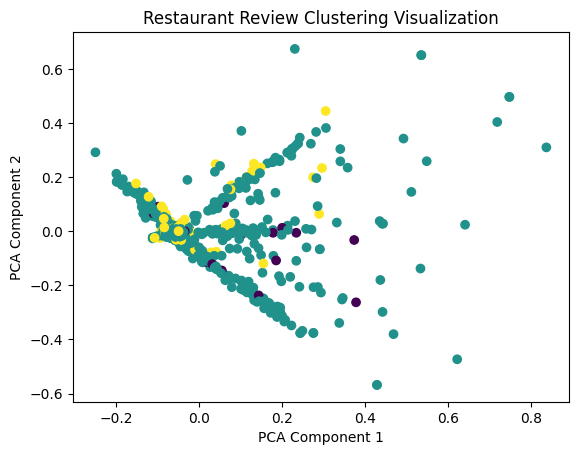

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Restaurant Review Clustering Visualization")
plt.show()
